In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/fatal-police-shootings-data.csv")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [ ]:
df.describe()

,id,age,longitude,latitude
count,7802.000000,7316.000000,6963.000000,6963.000000
mean,4307.825173,37.199973,-97.058132,36.685432
std,2435.921303,12.969444,16.578591,5.398530
min,3.000000,2.000000,-160.007000,19.498000
25%,2186.250000,27.000000,-112.037000,33.480000
50%,4332.500000,35.000000,-94.249000,36.104000
75%,6416.750000,45.000000,-83.094000,40.032500
max,8484.000000,92.000000,-67.867000,71.301000


In [ ]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [ ]:
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [ ]:
df['name'].value_counts()

Michael Johnson          3
Brandon Jones            2
Robert Edwards           2
Michael Ferguson         2
George Tillman           2
                        ..
Silas Andrew Smith       1
Antonio Garcia Jr.       1
Steve Scott              1
Caleb Edward Blaylock    1
Colin Merrill West       1
Name: name, Length: 7344, dtype: int64

In [ ]:
df.shape

(7802, 17)

In [ ]:
df.isna().sum()

id                            0
name                        425
date                          0
manner_of_death               0
armed                       209
age                         486
gender                       21
race                       1509
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        899
body_camera                   0
longitude                   839
latitude                    839
is_geocoding_exact            0
dtype: int64

In [ ]:
#Checking if any date entry is invalid
import datetime
df['date'].value_counts()
err_date_arr = list()
for i in df['date']:
  year, month, day = i.split("-")
  isValidDate = True
  try:
    datetime.datetime(int(year), int(month), int(day))
  except ValueError:
    isValidDate = False
    err_date_arr.append(i)
err_date_arr

[]

In [ ]:
df['manner_of_death'].value_counts()

shot                7463
shot and Tasered     339
Name: manner_of_death, dtype: int64

In [ ]:
df['age'].value_counts()

31.0    256
27.0    252
32.0    252
34.0    250
33.0    242
       ... 
78.0      1
89.0      1
8.0       1
92.0      1
2.0       1
Name: age, Length: 81, dtype: int64

In [ ]:
#Checking if age is less than 0 and greater than 100
if len(df[df['age'] < 0]['age']) == 0:
  print("No one is of age negative")
if len(df[df['age'] > 110]['age']) == 0:
  print("No one is of age greater than 110")

No one is of age negative
No one is of age greater than 110


In [ ]:
df['gender'].value_counts()

M    7429
F     352
Name: gender, dtype: int64

In [ ]:
df['armed'].value_counts()

gun               4448
knife             1115
unarmed            458
undetermined       321
vehicle            279
                  ... 
binoculars           1
cordless drill       1
bean-bag gun         1
wrench               1
stone                1
Name: armed, Length: 106, dtype: int64

In [ ]:
df['race'].value_counts()

W    3204
B    1695
H    1135
A     113
N     100
O      46
Name: race, dtype: int64

In [ ]:
len(df['state'].value_counts())

51

In [ ]:
df['signs_of_mental_illness'].value_counts()

False    6151
True     1651
Name: signs_of_mental_illness, dtype: int64

In [ ]:
df['threat_level'].value_counts()

attack          4907
other           2583
undetermined     312
Name: threat_level, dtype: int64

In [ ]:
df['is_geocoding_exact'].value_counts()

True     7784
False      18
Name: is_geocoding_exact, dtype: int64

In [ ]:
#Till above, erraneous data has been verified and corrected
#From here we will handle null values
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [ ]:
#Removing name column as it won't serve any model
df.drop(['name'], axis=1, inplace=True)
df.columns


Index(['id', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race',
       'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [ ]:
missing_values_array = list()
for i in df:
  if df[i].isna().sum() > 0:
    missing_values_array.append(i)
missing_values_array

['armed', 'age', 'gender', 'race', 'flee', 'longitude', 'latitude']

In [ ]:
object_array = list()
numerical_array = list()
for i in missing_values_array:
  if str(df[i].dtype) in ["object", "bool"]:
    object_array.append(i)
  elif str(df[i].dtype) in ["int64", "float64"]:
    numerical_array.append(i)
print(object_array)
print(numerical_array)


['armed', 'gender', 'race', 'flee']
['age', 'longitude', 'latitude']


In [ ]:
import numpy as np
#Adding "age" also to categorical as they are unique 
#values and any null value replace like mean of that column is not correct option
object_array.append("age")
for i in object_array:
  d = dict(df[i].value_counts())
  most_repeated = ""
  count = 0
  for j, k in d.items():
    most_repeated = j
    count += 1
    if count == 1:
      break
  if most_repeated != "":
    df[i].replace(np.nan, most_repeated, inplace=True)
for i in object_array:
  if df[i].isna().sum() > 0:
    print(i)

In [ ]:
for i in numerical_array:
  df[i].fillna(method="ffill", inplace=True)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


Check In: 2

In [ ]:
#Converting Threat level other and undetermined to same property other
df["threat_level"].replace("undetermined", "other", inplace=True)

#Converting then to 0 and 1
df["threat_level"].replace("attack", 1, inplace=True)
df["threat_level"].replace("other", 0, inplace=True)
df["threat_level"].value_counts()


1    4907
0    2895
Name: threat_level, dtype: int64

In [ ]:
#Removing BodyCamera column as it done not provide any value to our analysis
df.drop(columns=["body_camera"], axis=True, inplace=True)

In [ ]:
#Converting Date to Only Year to get information from that column
for i, j in enumerate(df["date"]):
  df["date"].iloc[i] = int(j[:4])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0    2015
1    2015
2    2015
3    2015
4    2015
Name: date, dtype: object

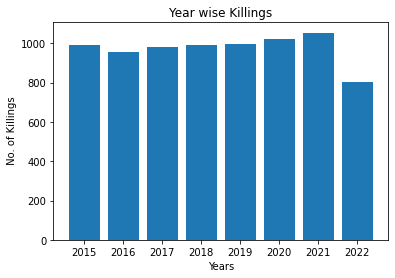

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

date_dict = dict(df["date"].value_counts())
X_date = [i for i, j in date_dict.items()]
Y_date = [j for i, j in date_dict.items()]
plt.bar(X_date, Y_date)
plt.xlabel("Years")
plt.ylabel(" No. of Killings")
plt.title("Year wise Killings")
plt.show()


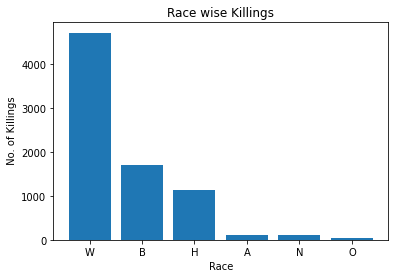

In [ ]:
race_dict = dict(df["race"].value_counts())

X_date = [i for i, j in race_dict.items()]
Y_date = [j for i, j in race_dict.items()]
plt.bar(X_date, Y_date)
plt.xlabel("Race")
plt.ylabel(" No. of Killings")
plt.title("Race wise Killings")
plt.show()


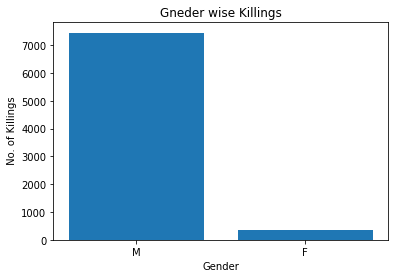

In [ ]:
gender_dict = dict(df["gender"].value_counts())

X_date = [i for i, j in gender_dict.items()]
Y_date = [j for i, j in gender_dict.items()]
plt.bar(X_date, Y_date)
plt.xlabel("Gender")
plt.ylabel(" No. of Killings")
plt.title("Gender wise Killings")
plt.show()


In [ ]:
#Removing columns Id, City, State, is_geocoding_exact, longitude, latitude as they do not provide much value to the model
df["is_geocoding_exact"].value_counts()
df.drop(["id", "is_geocoding_exact", "city", "state", "latitude", "longitude"], axis=1, inplace=True)
df.head()

,date,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,longitude,latitude
0,2015,shot,gun,53.0,M,A,True,1,Not fleeing,-123.122,47.247
1,2015,shot,gun,47.0,M,W,False,1,Not fleeing,-122.892,45.487
2,2015,shot and Tasered,unarmed,23.0,M,H,False,0,Not fleeing,-97.281,37.695
3,2015,shot,toy weapon,32.0,M,W,True,1,Not fleeing,-122.422,37.763
4,2015,shot,nail gun,39.0,M,H,False,1,Not fleeing,-104.692,40.384


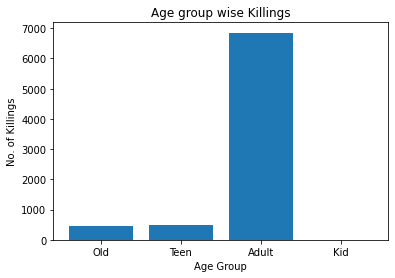

In [ ]:
X_age_group = ["Old", "Teen", "Adult", "Kid"]
old = len(df[df["age"] >= 60])
kid = len(df[df["age"] <= 10])
adult = len(df[(df["age"] > 20) & (df["age"] < 60)])
teen = len(df[(df["age"] > 10) & (df["age"] <= 20)])
Y_age_numbers = [old, teen, adult, kid]
plt.bar(X_age_group, Y_age_numbers)
plt.xlabel("Age Group")
plt.ylabel("No. of Killings")
plt.title("Age group wise Killings")
plt.show()

In [ ]:
#Converting car, Foot, and Other in Fleeing to Fleeing
df["flee"].value_counts()
df["flee"].replace("Car", "Fleeing", inplace=True)
df["flee"].replace("Foot", "Fleeing", inplace=True)
df["flee"].replace("Other", "Fleeing", inplace=True)
df["flee"].value_counts()

#Encoding them with 0 and 1
df["flee"].replace("Fleeing", 1, inplace=True)
df["flee"].replace("Not fleeing", 0, inplace=True)
df["flee"].value_counts()

0    5257
1    2545
Name: flee, dtype: int64

In [ ]:
df["threat_level"].value_counts()

1    4907
0    2895
Name: threat_level, dtype: int64

In [ ]:
#Encoding signs_of_mental_illness column with 0 and 1
df["signs_of_mental_illness"].replace(True, 1, inplace=True)
df["signs_of_mental_illness"].replace(False, 0, inplace=True)
df["signs_of_mental_illness"].value_counts()

0    6151
1    1651
Name: signs_of_mental_illness, dtype: int64

In [ ]:
#Removing date and gender as it will not give much inference to our analysis
df.drop(["date", "gender"], axis=1, inplace=True)
df.head()

,manner_of_death,armed,age,race,signs_of_mental_illness,threat_level,flee
0,shot,gun,53.0,A,1,1,0
1,shot,gun,47.0,W,0,1,0
2,shot and Tasered,unarmed,23.0,H,0,0,0
3,shot,toy weapon,32.0,W,1,1,0
4,shot,nail gun,39.0,H,0,1,0


In [ ]:
df["manner_of_death"].value_counts()

shot                7463
shot and Tasered     339
Name: manner_of_death, dtype: int64

check IN-3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

In [3]:
data = pd.read_csv("/content/drive/MyDrive/shootings.csv")

In [8]:
data.shape

(4895, 15)

In [9]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [11]:
df1=data['manner_of_death'].value_counts().reset_index().rename(columns={'index':'manner_of_death','manner_of_death':'count'})



In [17]:
fig = go.Figure(go.Bar(x=df1['manner_of_death'],y=df1['count'],marker_color='purple'))
fig.update_layout(title_text='Frequency of reason of death',xaxis_title="manner of death",yaxis_title="count",height=500,width=500)
fig.show()

In [18]:
df=data['armed'].value_counts().reset_index().rename(columns={'index':'weapons used','armed':'count'})
fig = go.Figure(go.Bar(x=df['weapons used'],y=df['count'],marker_color='#7b6de3'))
fig.update_layout(title_text='Frequency of different weapons used',xaxis_title="weapons used",yaxis_title="count",height=700,width=1000)
fig.show()

In [19]:
df=data['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
fig = go.Figure(go.Bar(x=df['gender'],y=df['count'],marker_color='#148edb'))
fig.update_layout(title_text='gender ratio',xaxis_title="gender",yaxis_title="count",height=500,width=500)
fig.show()

In [20]:
df=data.groupby('date')['manner_of_death'].count().reset_index()
df['date']=pd.to_datetime(df['date'])
df['year-month'] = df['date'].apply(lambda x: str(x.year) + '-' + str(x.month))
df_ym=df.groupby('year-month')[['manner_of_death']].sum().reset_index()
df_ym['year-month']=pd.to_datetime(df_ym['year-month'])
df_ym=df_ym.sort_values('year-month')

In [21]:
df

,date,manner_of_death,year-month
0,2015-01-02,2,2015-1
1,2015-01-03,1,2015-1
2,2015-01-04,3,2015-1
3,2015-01-05,1,2015-1
4,2015-01-06,4,2015-1
...,...,...,...
1787,2020-06-09,1,2020-6
1788,2020-06-11,3,2020-6
1789,2020-06-12,2,2020-6
1790,2020-06-13,2,2020-6


In [23]:
df=data['race'].value_counts().reset_index().rename(columns={'index':'race','race':'count'})
fig = go.Figure(go.Bar(x=df['race'],y=df['count'],marker={'color': df['count'],'colorscale': 'Viridis'},))
fig.update_layout(title_text='frequency of different race',xaxis_title="race",yaxis_title="count",height=500,width=500)
fig.show()

In [24]:
fig = go.Figure(go.Bar(x=df_ym['year-month'],y=df_ym['manner_of_death'],marker={'color': df_ym['manner_of_death'],'colorscale': 'Viridis'},text=df_ym['manner_of_death'],textposition = "outside",))
fig.update_layout(title_text='No of deaths (2015-2020)',yaxis_title="no. of deaths")
fig.show()

In [25]:
fig = go.Figure(go.Box(y=data['age'],name="Age"))
fig.update_layout(title="Distribution of Age")
fig.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



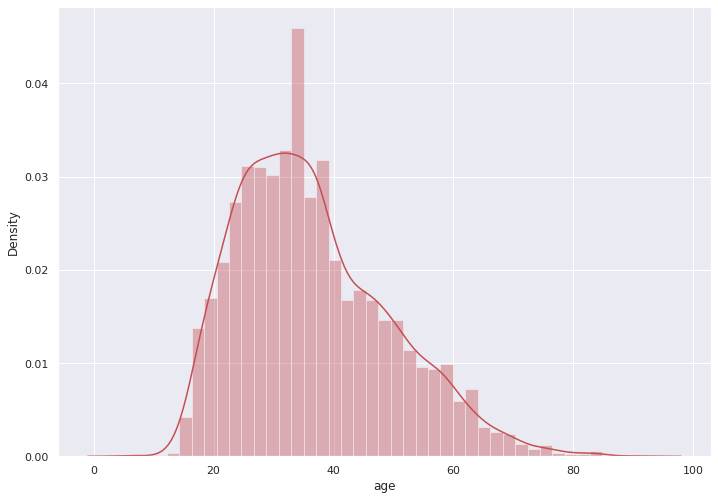

In [26]:
sns.distplot(data['age'],kde=True,color='r')

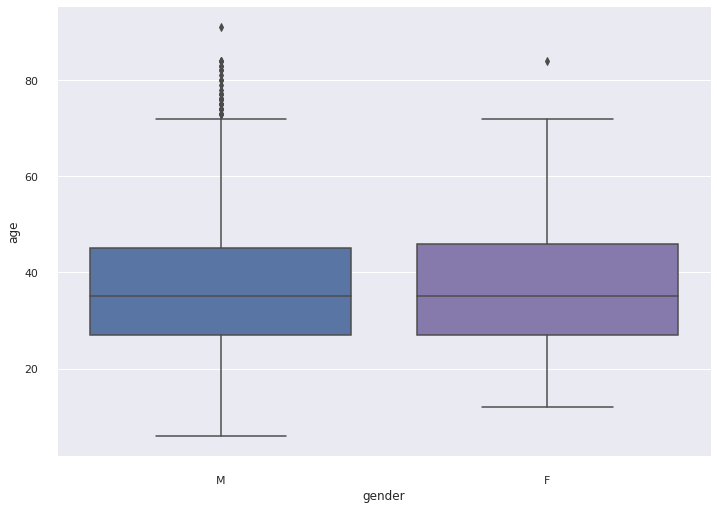

In [4]:
sns.boxplot(x="gender", y="age", palette=["b", "m"],data=data,)
sns.despine(offset=10, trim=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/dis

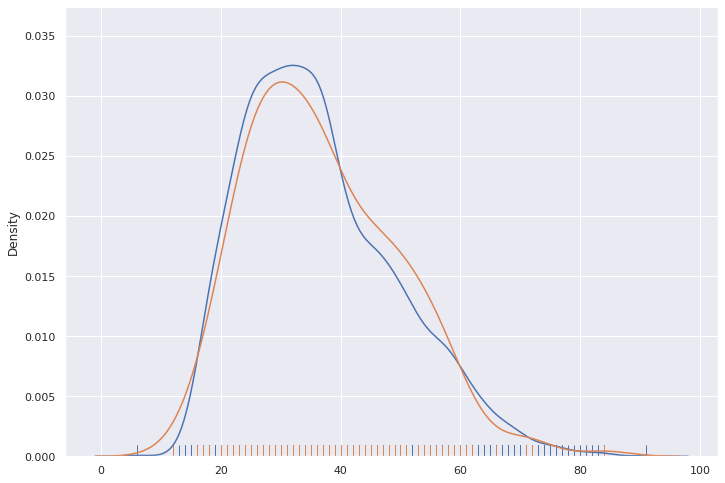

In [5]:
df_male=data[data['gender']=='M']['age'].values
df_female=data[data['gender']=='F']['age'].values
sns.distplot(df_male, hist=False, rug=True)
sns.distplot(df_female, hist=False, rug=True)

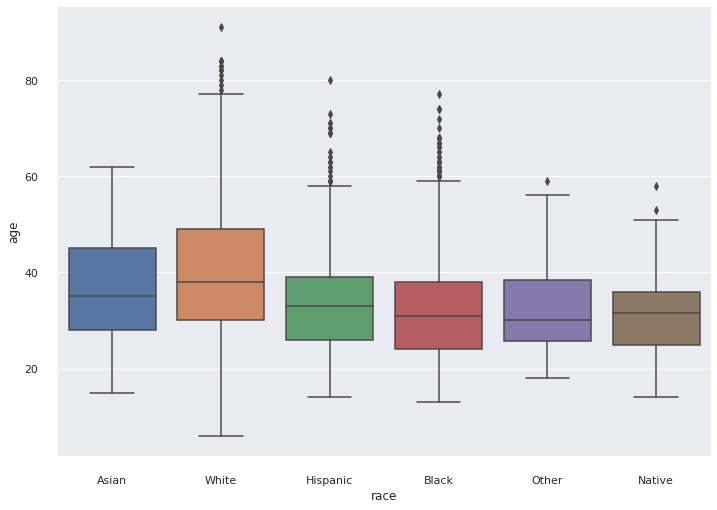

In [4]:
sns.boxplot(x="race", y="age",data=data)
sns.despine(offset=10, trim=True)